In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from seaborn import heatmap

Question 1 (5 points): For each of the features of the data (length, chroma stft mean,
etc.), calculate and print the mean and standard deviation of that feature value in X train.
Describe (in 1-3 sentences) why these values might cause an issue when using the raw values
for neural network classification.

In [2]:
music_data = pd.read_csv("Data/features_3_sec.csv")
y = np.array(music_data["label"])
music_data = music_data.drop(columns=["label", "filename"])
X = np.array(music_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_features = np.swapaxes(X_train, 0, 1)

i = 0
for feature in X_features:
    print(music_data.columns[i])
    print("Mean: ", np.mean(feature))  
    print("Standard Deviation: ", np.std(feature))
    print("\n")
    i += 1


length
Mean:  66149.0
Standard Deviation:  0.0


chroma_stft_mean
Mean:  0.3793348486780434
Standard Deviation:  0.08994476733531448


chroma_stft_var
Mean:  0.08491067684514704
Standard Deviation:  0.009636830553150478


rms_mean
Mean:  0.13045734546834067
Standard Deviation:  0.06831589241988416


rms_var
Mean:  0.0026741077189679236
Standard Deviation:  0.003602569391982133


spectral_centroid_mean
Mean:  2197.217605496407
Standard Deviation:  750.5751506552442


spectral_centroid_var
Mean:  416394.5709013398
Standard Deviation:  435125.0983493911


spectral_bandwidth_mean
Mean:  2241.4160274982455
Standard Deviation:  542.0331439300644


spectral_bandwidth_var
Mean:  118876.02725554115
Standard Deviation:  101086.7718012885


rolloff_mean
Mean:  4562.063904866029
Standard Deviation:  1638.4681035407077


rolloff_var
Mean:  1635723.1968233867
Standard Deviation:  1494492.381244041


zero_crossing_rate_mean
Mean:  0.10242616696474113
Standard Deviation:  0.04557790251849784


zero_cr

Question 2 (5 points): Using sklearn’s preprocessing.StandardScaler(), fit to the X train
data, and transform both the X train and X test data based on the pre-processing fit. Again,
for each of the features of the data (length, chroma stft mean, etc.), calculate and print the
mean and standard deviation of that feature value in the updated, pre-processed X train.
Describe briefly (in 1-3 sentences) what happened and why it might be a good idea to do
this transformation for a multi-layer perceptron.

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_features = np.swapaxes(X_train, 0, 1)
i = 0
for feature in X_features:
    print(music_data.columns[i])
    print("Mean: ", np.mean(feature))  
    print("Standard Deviation: ", np.std(feature))
    print("\n")
    i += 1

length
Mean:  0.0
Standard Deviation:  0.0


chroma_stft_mean
Mean:  -1.0846623343685213e-16
Standard Deviation:  1.0


chroma_stft_var
Mean:  -4.106824990189994e-15
Standard Deviation:  0.9999999999999982


rms_mean
Mean:  -5.778938666717531e-16
Standard Deviation:  0.9999999999999974


rms_var
Mean:  -1.2438054145750503e-14
Standard Deviation:  0.9999999999999988


spectral_centroid_mean
Mean:  1.131782911189449e-15
Standard Deviation:  0.9999999999999981


spectral_centroid_var
Mean:  -1.4636273507821133e-15
Standard Deviation:  1.0000000000000013


spectral_bandwidth_mean
Mean:  3.24865259818244e-15
Standard Deviation:  0.9999999999999992


spectral_bandwidth_var
Mean:  -5.379747364970428e-15
Standard Deviation:  0.9999999999999996


rolloff_mean
Mean:  5.6926991204603624e-15
Standard Deviation:  1.0000000000000009


rolloff_var
Mean:  4.476454797988119e-16
Standard Deviation:  0.9999999999999997


zero_crossing_rate_mean
Mean:  -8.340342097304179e-15
Standard Deviation:  0.9999999

Question 3 (30 points): Use K-fold cross-validation with three folds to find the best values
to use for the number of neurons in a single hidden layer across 50, 100, 200, and 500
neurons and for the initial learning rate (learning rate init) across 0.0001, 0.001, 0.01, 0.1,
and 1. Create a heatmap showing the average validation accuracy across all folds for each
parameter combination. Note in your report which combination performs best.

c:\Users\Sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

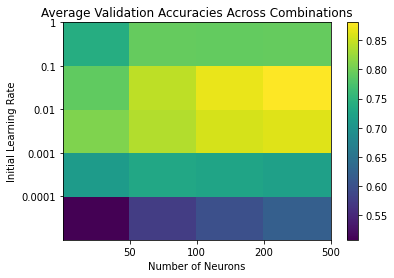

In [4]:
splits = KFold(n_splits = 3)
num_neurons = [50, 100, 200, 500]
learn_rate = [0.0001, 0.001, 0.01, 0.1, 1]
fold_scores = []
validation_accuracy = []

for lr in learn_rate:
    for n in num_neurons:
        for train_index, val_index in splits.split(X_train):
            neural_network = MLPClassifier(hidden_layer_sizes = n, activation = "tanh", solver = "sgd", learning_rate_init = lr, random_state = 42)
            X_subtrain = X_train[train_index]
            X_val = X_train[val_index]
            y_subtrain = y_train[train_index]
            y_val = y_train[val_index]
            neural_network.fit(X_subtrain, y_subtrain)
            score = accuracy_score(y_val, neural_network.predict(X_val))
            fold_scores.append(score)
            
        validation_accuracy.append(np.mean(fold_scores))
        fold_scores.clear()

validation_accuracy = np.reshape(np.array(validation_accuracy), (5,4))

x_labels = ["50", "100", "200", "500"]
y_labels = ["0.0001", "0.001", "0.01", "0.1", "1"]
plt.xticks(range(1,len(x_labels)+1), x_labels)
plt.yticks(range(1,len(y_labels)+1), y_labels)
plt.title("Average Validation Accuracies Across Combinations")
plt.xlabel("Number of Neurons")
plt.ylabel("Initial Learning Rate")
plt.pcolor(validation_accuracy)
cbar = plt.colorbar()
plt.show()

Question 4 (25 points): Use K-fold cross-validation with three folds to find the structure of
the network to use. Set the initial learning rate to be the best value you found in Question 3.
Try the following combinations of network structure: (100), (100,100), (100,100,100), (200),
(200,100), (200,100,100), (500), (500,200), (500,200,100). Note the structure of the network
that gives the best results in the report.

In [7]:
network_structure = [(100), (100,100), (100,100,100), (200),
(200,100), (200,100,100), (500), (500,200), (500,200,100)]
structure_info = []

for struct in network_structure:
    for train_index, val_index in splits.split(X_train):
        neural_network = MLPClassifier(hidden_layer_sizes=struct, activation = "tanh", solver = "sgd", learning_rate_init = 0.1, random_state = 42)
        X_subtrain = X_train[train_index]
        X_val = X_train[val_index]
        y_subtrain = y_train[train_index]
        y_val = y_train[val_index]
        neural_network.fit(X_subtrain, y_subtrain)
        score = accuracy_score(y_val, neural_network.predict(X_val))
        fold_scores.append(score)
    structure_info.append(np.mean(fold_scores))
    fold_scores.clear()

for i in range(len(network_structure)):
    print(network_structure[i])
    print(structure_info[i])
    print("\n")
            

100
0.8435935935935936


(100, 100)
0.8606106106106107


(100, 100, 100)
0.8638638638638638


200
0.8683683683683684


(200, 100)
0.8770020020020021


(200, 100, 100)
0.8788788788788789


500
0.8805055055055057


(500, 200)
0.8885135135135135


(500, 200, 100)
0.8906406406406407




Question 5 (20 points): Using the best structure and best initial learning rates found above,
now train MLPs on the entire training set for 1000 iterations (max iter=1000). Generate 10
different random integers to use as initial random states for each MLP, but otherwise, use
the same parameters. Show the training and testing accuracy for each of the 10 classifiers.
Plot the 10 resulting loss curves (note that you can access the loss curve from the classifier
in clf.loss curve ).

Question 6 (15 points): Show the confusion matrix for the classifier. Print the matrix itself.
Plot the confusion matrix with a heatmap (I recommend using seaborn’s heatmap for this).
Which classes are most often confused for each other? Include a brief discussion of this in
the report (1-3 sentences).